In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
filepath = '/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/FeatureEngineered/AKAM_feature_engineeredv2.csv' 
data = pd.read_csv(filepath)

data['date'] = pd.to_datetime(data['date'])
data = data.dropna(subset=['RET', 'PRC'])

### MA for price

In [3]:
data['PRC_MA_5'] = data['PRC'].rolling(window=5).mean()
data['PRC_MA_10'] = data['PRC'].rolling(window=10).mean()
data['PRC_MA_20'] = data['PRC'].rolling(window=20).mean()

data['RET_MA_5'] = data['RET'].rolling(window=5).mean()
data['RET_MA_10'] = data['RET'].rolling(window=10).mean()
data['RET_MA_20'] = data['RET'].rolling(window=20).mean()

### ES for RET

In [4]:
data['PRC_EMA_5'] = data['PRC'].ewm(span=5, adjust=False).mean()
data['PRC_EMA_10'] = data['PRC'].ewm(span=10, adjust=False).mean()
data['PRC_EMA_20'] = data['PRC'].ewm(span=20, adjust=False).mean()

data['RET_EMA_5'] = data['RET'].ewm(span=5, adjust=False).mean()
data['RET_EMA_10'] = data['RET'].ewm(span=10, adjust=False).mean()
data['RET_EMA_20'] = data['RET'].ewm(span=20, adjust=False).mean()

In [5]:
data = data.dropna()

In [7]:
features = ['PRC_MA_5', 'PRC_MA_10', 'PRC_MA_20', 'PRC_EMA_5', 'PRC_EMA_10', 'PRC_EMA_20',
            'RET_MA_5', 'RET_MA_10', 'RET_MA_20', 'RET_EMA_5', 'RET_EMA_10', 'RET_EMA_20']
target_prc = 'PRC'
target_ret = 'RET'

In [19]:
# split for `PRC`
X_prc = data[features]
y_prc = data[target_prc]
X_train_prc, X_test_prc, y_train_prc, y_test_prc = train_test_split(X_prc, y_prc, test_size=0.2, random_state=42)

# split for `RET`
X_ret = data[features]
y_ret = data[target_ret]
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(X_ret, y_ret, test_size=0.2, random_state=42)


In [9]:
# Create Linear Regression Models

model_prc = LinearRegression()
model_prc.fit(X_train_prc, y_train_prc)

model_ret = LinearRegression()
model_ret.fit(X_train_ret, y_train_ret)

LinearRegression()

In [10]:
y_pred_prc = model_prc.predict(X_test_prc)

y_pred_ret = model_ret.predict(X_test_ret)

In [11]:
mse_prc = mean_squared_error(y_test_prc, y_pred_prc)
mse_ret = mean_squared_error(y_test_ret, y_pred_ret)

In [12]:
print(f'Mean Squared Error for `PRC` prediction: {mse_prc:.4f}')
print(f'Mean Squared Error for `RET` prediction: {mse_ret:.4f}')

Mean Squared Error for `PRC` prediction: 0.0000
Mean Squared Error for `RET` prediction: 0.0003


In [13]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.values, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

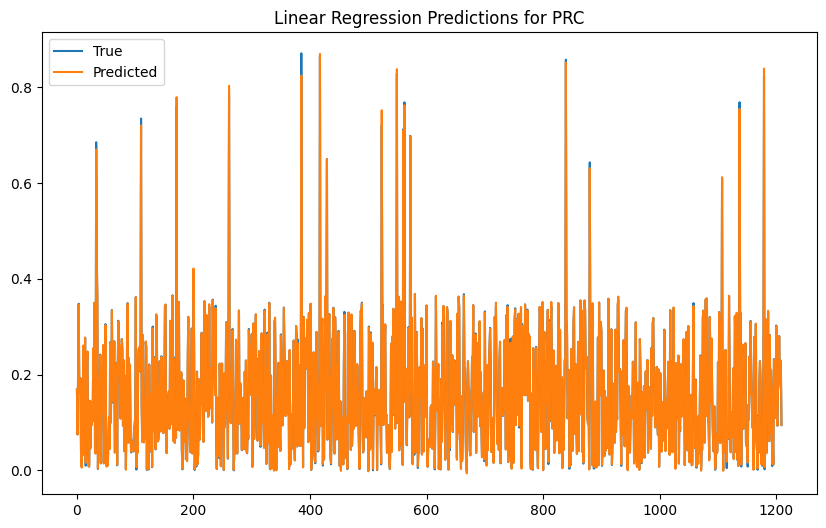

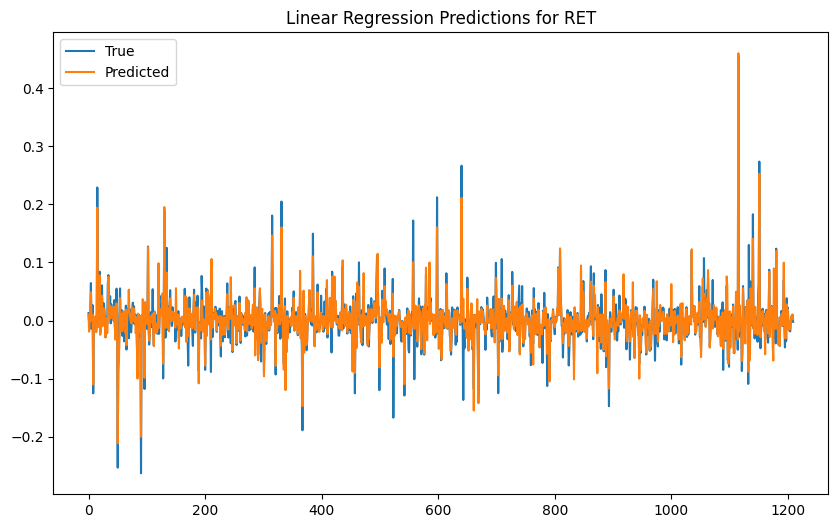

In [14]:
plot_predictions(y_test_prc, y_pred_prc, title="Linear Regression Predictions for PRC")

plot_predictions(y_test_ret, y_pred_ret, title="Linear Regression Predictions for RET")


### Improvement

In [15]:
X = data[features]
y_prc = data[target_prc]
y_ret = data[target_ret]

In [21]:
X_train, X_test, y_train_prc, y_test_prc = train_test_split(X, y_prc, test_size=0.2, random_state=42)
_, _, y_train_ret, y_test_ret = train_test_split(X, y_ret, test_size=0.2, random_state=42)


In [22]:
# Scaling might help
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [26]:
# lass for PRC
lasso_prc = Lasso(alpha=0.01)
lasso_prc.fit(X_train_poly, y_train_prc)

Lasso(alpha=0.01)

In [27]:
# Train Ridge Regression for RET
ridge_ret = Ridge(alpha=0.5)
ridge_ret.fit(X_train_poly, y_train_ret)

Ridge(alpha=0.5)

In [28]:
y_pred_prc = lasso_prc.predict(X_test_poly)
y_pred_ret = ridge_ret.predict(X_test_poly)

In [29]:
mse_prc = mean_squared_error(y_test_prc, y_pred_prc)
mse_ret = mean_squared_error(y_test_ret, y_pred_ret)

print(f'Mean Squared Error for PRC (Lasso): {mse_prc:.4f}')
print(f'Mean Squared Error for RET (Ridge): {mse_ret:.4f}')

Mean Squared Error for PRC (Lasso): 0.0002
Mean Squared Error for RET (Ridge): 0.0003


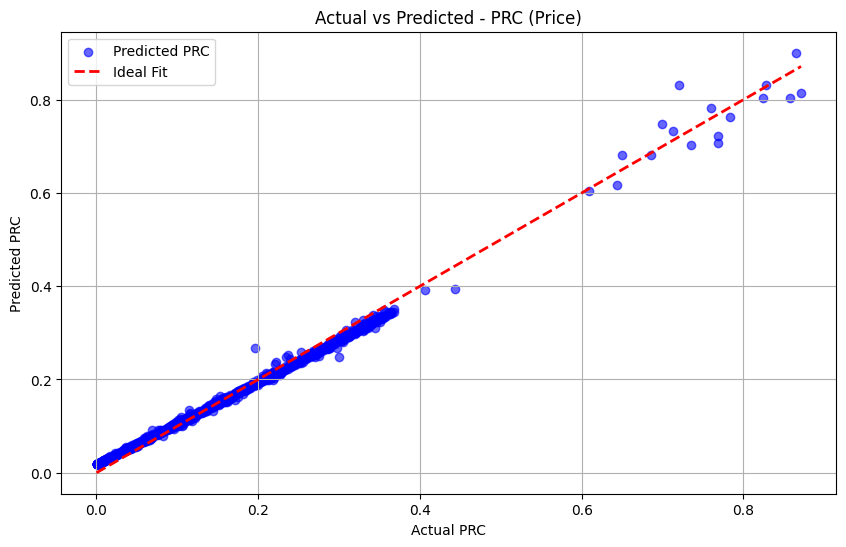

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_prc, y_pred_prc, alpha=0.6, color='blue', label='Predicted PRC')
plt.plot([min(y_test_prc), max(y_test_prc)], [min(y_test_prc), max(y_test_prc)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.title('Actual vs Predicted - PRC (Price)')
plt.xlabel('Actual PRC')
plt.ylabel('Predicted PRC')
plt.legend()
plt.grid(True)
plt.show()

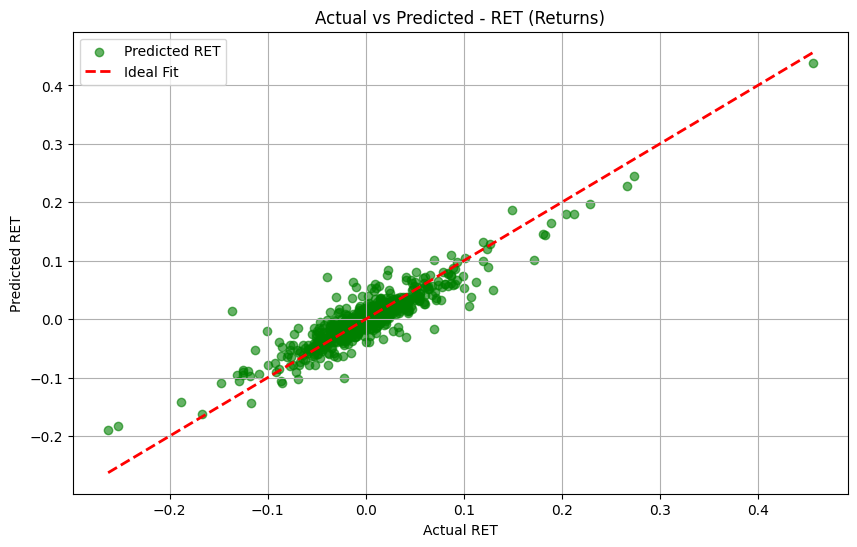

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ret, y_pred_ret, alpha=0.6, color='green', label='Predicted RET')
plt.plot([min(y_test_ret), max(y_test_ret)], [min(y_test_ret), max(y_test_ret)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.title('Actual vs Predicted - RET (Returns)')
plt.xlabel('Actual RET')
plt.ylabel('Predicted RET')
plt.legend()
plt.grid(True)
plt.show()